In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_c= df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense'],axis=1)

In [4]:
sales_c

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,496334,1
2019-02-01,2019,306455,2
2019-03-01,2019,476270,3
2019-04-01,2019,628463,4
2019-05-01,2019,366750,5
2019-06-01,2019,352324,6
2019-07-01,2019,657300,7
2019-08-01,2019,429552,8
2019-09-01,2019,499906,9


<Axes: title={'center': 'Product C'}, xlabel='Month-Year'>

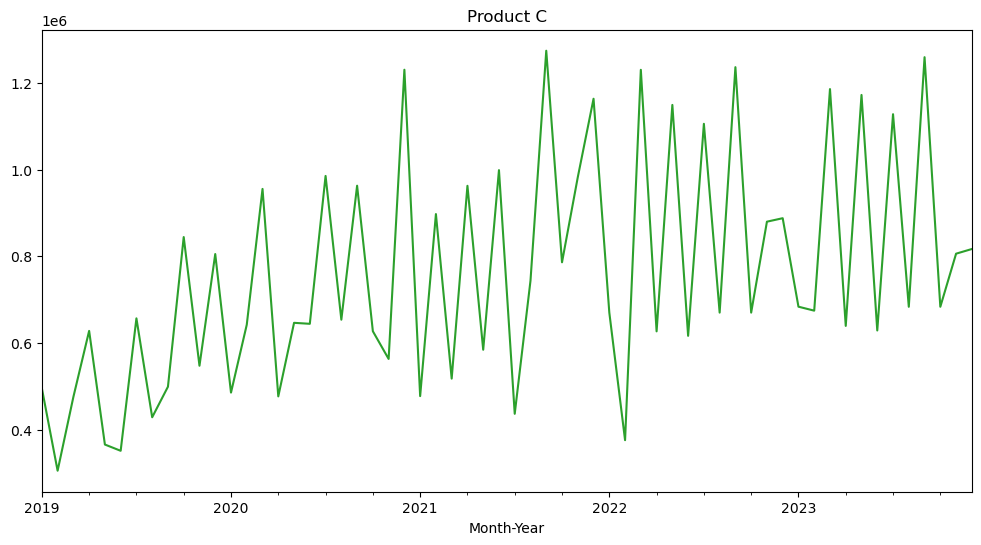

In [5]:
sales_c['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product C')

<Axes: ylabel='Frequency'>

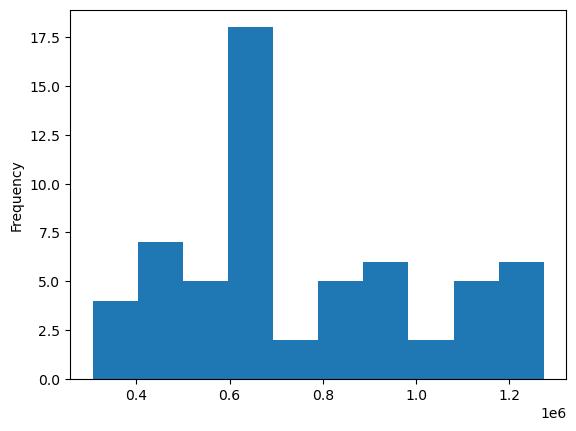

In [6]:
sales_c['Sales'].plot(kind='hist')

# Visualization

In [7]:
sales_c.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,496334,1
2019-02-01,2019,306455,2
2019-03-01,2019,476270,3
2019-04-01,2019,628463,4
2019-05-01,2019,366750,5


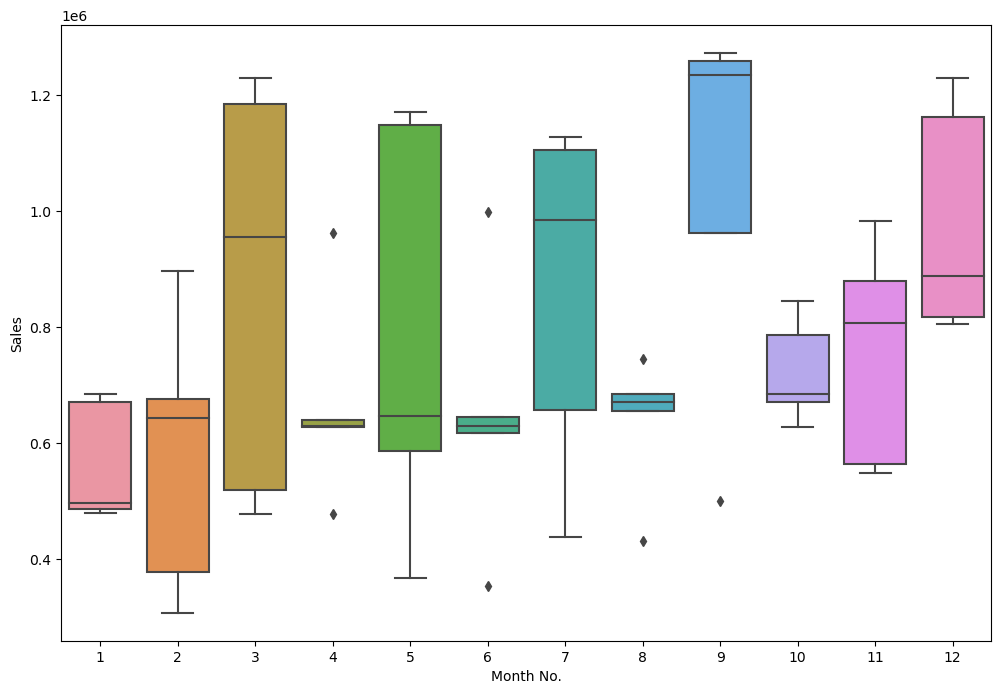

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Month No.',y='Sales')
plt.show()

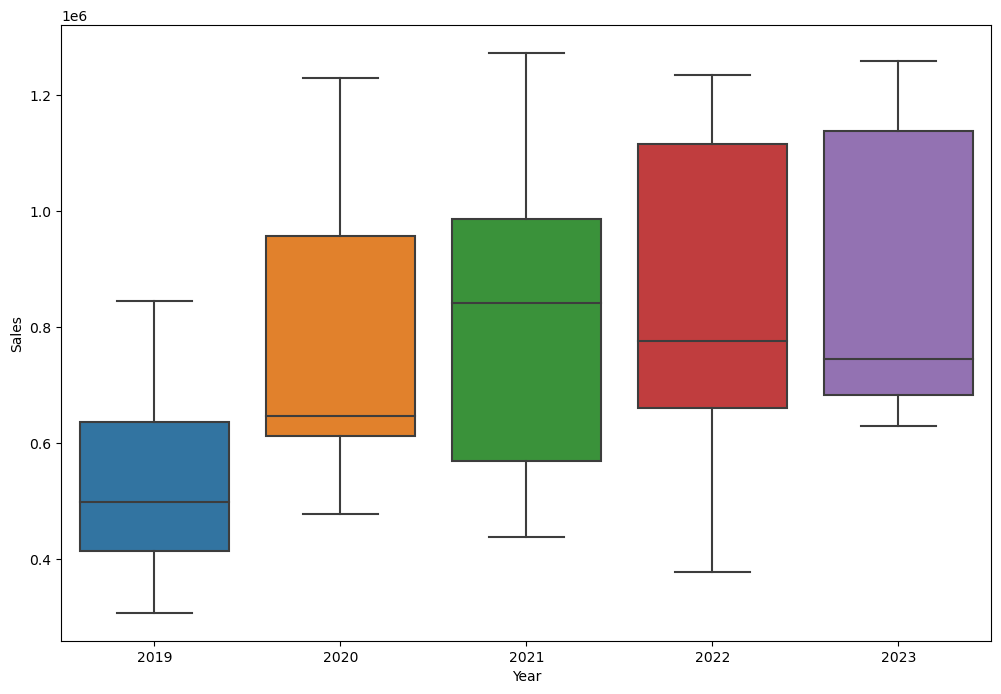

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [10]:
sales_c=df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense','Month No.','Year'],axis=1)

In [11]:
sales_c['quarter'] = sales_c.index.quarter
sales_c['month'] = sales_c.index.month
sales_c['year'] = sales_c.index.year

In [12]:
# Create lagged values
lagged_intervals = [3, 4, 5]  # Lagged intervals in months
for lag in lagged_intervals:
    sales_c[f'sales_lag_{lag}'] = sales_c['Sales'].shift(lag)

In [13]:
print(sales_c)

              Sales  quarter  month  year  sales_lag_3  sales_lag_4  \
Month-Year                                                            
2019-01-01   496334        1      1  2019          NaN          NaN   
2019-02-01   306455        1      2  2019          NaN          NaN   
2019-03-01   476270        1      3  2019          NaN          NaN   
2019-04-01   628463        2      4  2019     496334.0          NaN   
2019-05-01   366750        2      5  2019     306455.0     496334.0   
2019-06-01   352324        2      6  2019     476270.0     306455.0   
2019-07-01   657300        3      7  2019     628463.0     476270.0   
2019-08-01   429552        3      8  2019     366750.0     628463.0   
2019-09-01   499906        3      9  2019     352324.0     366750.0   
2019-10-01   844520        4     10  2019     657300.0     352324.0   
2019-11-01   548192        4     11  2019     429552.0     657300.0   
2019-12-01   805391        4     12  2019     499906.0     429552.0   
2020-0

# Train/Test Split

In [14]:
train= sales_c[:57]
test=sales_c[57:]

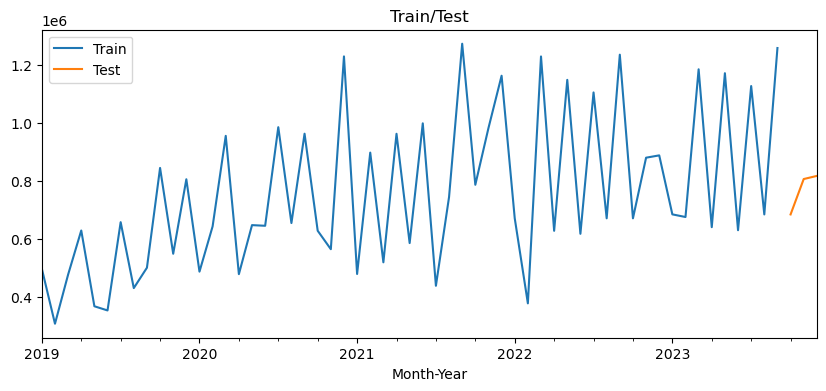

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [16]:
train.head()

,Sales,quarter,month,year,sales_lag_3,sales_lag_4,sales_lag_5
Month-Year,,,,,,,
2019-01-01,496334,1,1,2019,NaN,NaN,NaN
2019-02-01,306455,1,2,2019,NaN,NaN,NaN
2019-03-01,476270,1,3,2019,NaN,NaN,NaN
2019-04-01,628463,2,4,2019,496334.0,NaN,NaN
2019-05-01,366750,2,5,2019,306455.0,496334.0,NaN


In [17]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [18]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)



Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.9}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [19]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       objective='reg:squarederror',
                       max_depth=7,
                       colsample_bytree=1.0,
                       subsample= 0.9,
                       early_stopping_rounds=50,
                       learning_rate=0.1)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:736101.22132	validation_1-rmse:693636.00368
[69]	validation_0-rmse:10472.69026	validation_1-rmse:75208.57909


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
reg.best_iteration

20

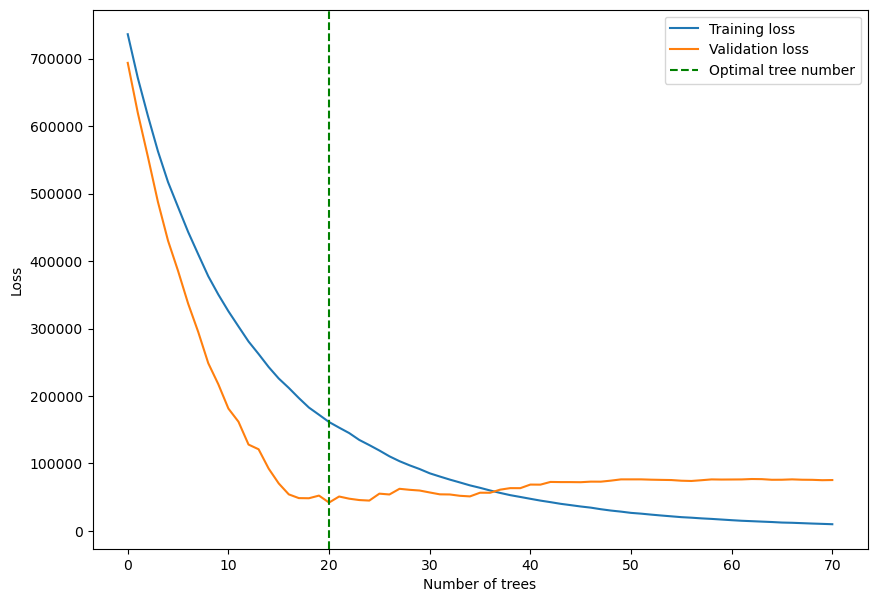

In [21]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(20,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

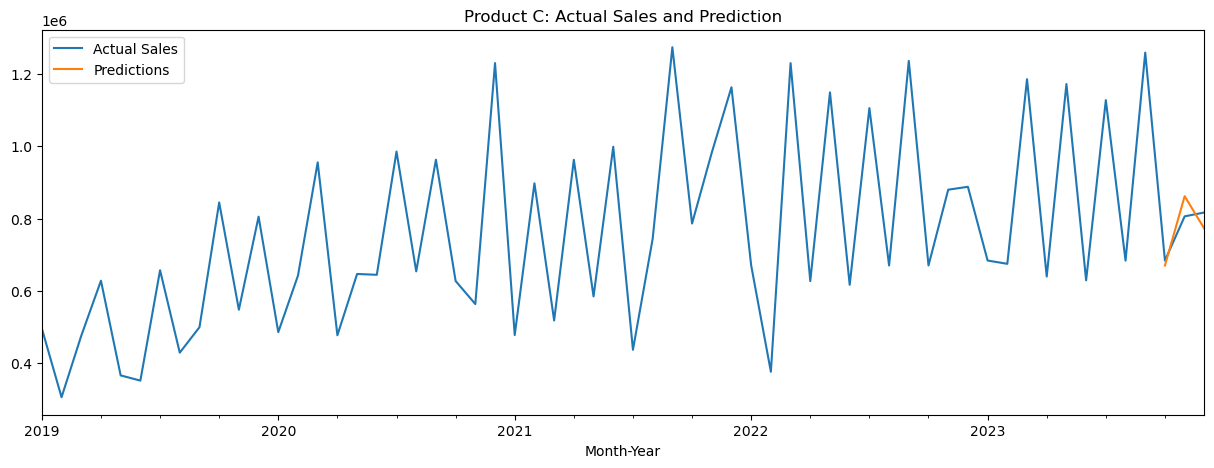

In [22]:
pred=reg.predict(x_test)
sales_c['prediction']=[None]*len(train) + list(pred)

ax = sales_c['Sales'].plot(figsize=(15, 5))
sales_c['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product C: Actual Sales and Prediction')
plt.show()

In [23]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 38042.979
MAPE - XGBoost: 0.048
MSE - XGBoost: 1767570165.418
RMSE - XGBoost: 42042.480


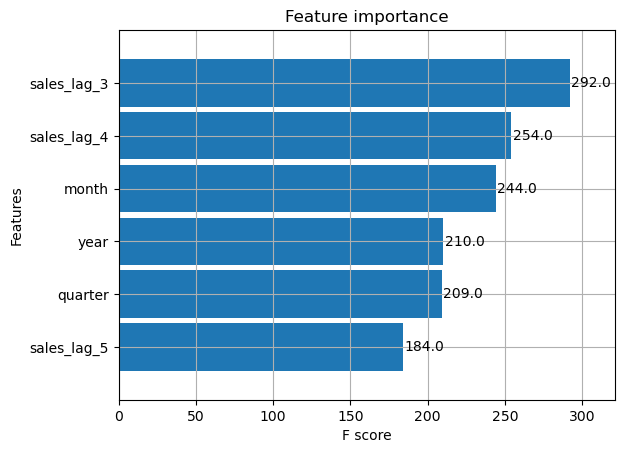

In [24]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)